# Differential Network Analysis of microbiota

In [338]:
import numpy as np
import pandas as pd
import collections
import os
from distance_functions_v2 import *
from scipy.stats import pearsonr
from sklearn import manifold
from bokeh.plotting import figure, output_file, show
from bokeh.models import ColumnDataSource, Range1d, LabelSet, Label
from bokeh.io import output_notebook, export_png
from bokeh.resources import CDN

from pandas import DataFrame
output_notebook(CDN)
import matplotlib.pyplot as plt
import hvplot.networkx as hvnx
import networkx as nx
import holoviews as hv

Loading BokehJS ...

In [2]:
dataDir='./Data/'
filename='microbiota_clean_wClass.xlsx'

path = os.path.join(dataDir,filename)

In [3]:
df = pd.read_excel(path)

In [ ]:
df.shape

In [ ]:
for i, el in enumerate(df.columns):
    print(i, el)

In [112]:
gs_list=[]
for el in df.columns:
    if el.startswith('g'):
        gs_list.append(el)

In [5]:
len(gs_list)

265

In [113]:

nuova_lista = []
for val in (gs_list):
    a=(np.array(df[val].value_counts()))
    if (a[0]<=200):
        nuova_lista.append(val)

In [8]:
len(nuova_lista)

77

In [92]:
name_list=pd.read_excel("gs_list.xlsx")
name_list.head()



,cod,Taxon,Taxon_1,Taxon_NCBI
0,g_1,[Barnesiellaceae] (other),Bacteria;Bacteroidetes;Bacteroidia;Bacteroidal...,Barnesiellaceae
1,g_10,Acinetobacter,Bacteria;Proteobacteria;Gammaproteobacteria;Ps...,Acinetobacter
2,g_100,Deltaproteobacteria (other),Bacteria;Proteobacteria;Deltaproteobacteria;Ot...,Deltaproteobacteria
3,g_101,Desulfitobacter,Bacteria;Firmicutes;Clostridia;Clostridiales;P...,Desulfitobacter
4,g_102,Desulfomicrobium,Bacteria;Proteobacteria;Deltaproteobacteria;De...,Desulfomicrobium


In [9]:
gs_list=nuova_lista

In [114]:
print (gs_list)

['g_1', 'g_103', 'g_104', 'g_108', 'g_109', 'g_110', 'g_115', 'g_121', 'g_122', 'g_125', 'g_128', 'g_136', 'g_139', 'g_14', 'g_141', 'g_146', 'g_148', 'g_149', 'g_150', 'g_151', 'g_154', 'g_163', 'g_17', 'g_178', 'g_180', 'g_185', 'g_186', 'g_191', 'g_197', 'g_198', 'g_200', 'g_201', 'g_218', 'g_220', 'g_221', 'g_222', 'g_223', 'g_23', 'g_233', 'g_235', 'g_240', 'g_244', 'g_247', 'g_25', 'g_250', 'g_260', 'g_294', 'g_295', 'g_30', 'g_36', 'g_37', 'g_44', 'g_51', 'g_52', 'g_53', 'g_54', 'g_55', 'g_57', 'g_58', 'g_59', 'g_62', 'g_63', 'g_64', 'g_65', 'g_75', 'g_76', 'g_81', 'g_82', 'g_83', 'g_84', 'g_86', 'g_88', 'g_91', 'g_92', 'g_93', 'g_98', 'g_99']


In [115]:
print (gs_list)

['g_1', 'g_103', 'g_104', 'g_108', 'g_109', 'g_110', 'g_115', 'g_121', 'g_122', 'g_125', 'g_128', 'g_136', 'g_139', 'g_14', 'g_141', 'g_146', 'g_148', 'g_149', 'g_150', 'g_151', 'g_154', 'g_163', 'g_17', 'g_178', 'g_180', 'g_185', 'g_186', 'g_191', 'g_197', 'g_198', 'g_200', 'g_201', 'g_218', 'g_220', 'g_221', 'g_222', 'g_223', 'g_23', 'g_233', 'g_235', 'g_240', 'g_244', 'g_247', 'g_25', 'g_250', 'g_260', 'g_294', 'g_295', 'g_30', 'g_36', 'g_37', 'g_44', 'g_51', 'g_52', 'g_53', 'g_54', 'g_55', 'g_57', 'g_58', 'g_59', 'g_62', 'g_63', 'g_64', 'g_65', 'g_75', 'g_76', 'g_81', 'g_82', 'g_83', 'g_84', 'g_86', 'g_88', 'g_91', 'g_92', 'g_93', 'g_98', 'g_99']


In [116]:
columnList=['Codice_PLIC','ScoreClass']+gs_list


In [117]:
len(columnList)

79

In [118]:
df = df[columnList]

In [119]:
df.shape

(336, 79)

In [120]:
my_vals=np.unique(df.loc[:,"ScoreClass"])

In [121]:
n_dim=len(gs_list) #n dimensioni delle matrici col coefficiente di pearson
print(n_dim)

77


In [122]:
n_non_gs=df.shape[1]-n_dim
print(n_non_gs)

2


In [123]:
all_nets={}

In [124]:
df.head()

,Codice_PLIC,ScoreClass,g_1,g_103,g_104,g_108,g_109,g_110,g_115,g_121,...,g_82,g_83,g_84,g_86,g_88,g_91,g_92,g_93,g_98,g_99
0,3,4,0.008347,0.000000,0.000044,0.029724,0.002131,0.000067,0.034008,0.000089,...,0.008391,0.005727,0.000622,0.000000,0.000000,0.000555,0.039824,0.000844,0.000910,0.000244
1,8,2,0.006197,0.005179,0.000221,0.000111,0.002966,0.000000,0.000000,0.000531,...,0.007326,0.002434,0.001284,0.000089,0.006330,0.000044,0.008344,0.001505,0.001859,0.000310
2,13,1,0.013109,0.007434,0.000814,0.000088,0.001298,0.000000,0.000066,0.001320,...,0.048258,0.002354,0.001364,0.000000,0.004663,0.000000,0.027538,0.004663,0.003013,0.000814
3,15,2,0.003112,0.001060,0.000316,0.007149,0.000474,0.000000,0.008683,0.000383,...,0.091725,0.001714,0.002413,0.000023,0.000925,0.000000,0.051557,0.000699,0.000361,0.000090
4,17,2,0.005811,0.003715,0.000130,0.000000,0.001944,0.000022,0.000000,0.000432,...,0.007496,0.000864,0.002225,0.000108,0.000346,0.000065,0.015488,0.000173,0.000540,0.000130


In [125]:
#definizione del net che conterrà tutte le 4 matrici
for val in my_vals:
    subdata=df.loc[df["ScoreClass"]==val]
    
    pearsonMat=np.zeros((n_dim,n_dim))
    for i in range(n_dim-1):
        for j in range(i+1,n_dim):
            pearsonMat[i,j]=np.abs(pearsonr(x=np.array(subdata.iloc[:,i+n_non_gs]),
                                           y=np.array(subdata.iloc[:,j+n_non_gs]))[0])
            pearsonMat[j,i]=pearsonMat[i,j]
    all_nets["S"+str(val)]=pearsonMat

In [127]:
for index, row in name_list.iterrows():
    for i,el in enumerate(gs_list):
        if el==row['cod']:
            gs_list[i]=row['Taxon_NCBI']

In [310]:
S1 = all_nets['S1']
link_S1 = DataFrame(columns = ['Var1','Var2','Pearson_Coeff'])
for i in range(n_dim-1):
    for j in range(i+1,n_dim):
        link_S1.loc[link_S1.shape[0]]=(gs_list[i],gs_list[j],S1[i][j])

In [183]:
S2 = all_nets['S2']
link_S2 = DataFrame(columns = ['Var1','Var2','Pearson_Coeff'])
for i in range(n_dim-1):
    for j in range(i+1,n_dim):
        link_S2.loc[link_S2.shape[0]]=(gs_list[i],gs_list[j],S2[i][j])

In [184]:
S3 = all_nets['S3']
link_S3 = DataFrame(columns = ['Var1','Var2','Pearson_Coeff'])
for i in range(n_dim-1):
    for j in range(i+1,n_dim):
        link_S3.loc[link_S3.shape[0]]=(gs_list[i],gs_list[j],S3[i][j])

In [185]:
S4 = all_nets['S4']
link_S4 = DataFrame(columns = ['Var1','Var2','Pearson_Coeff'])
for i in range(n_dim-1):
    for j in range(i+1,n_dim):
        link_S4.loc[link_S4.shape[0]]=(gs_list[i],gs_list[j],S4[i][j])


In [311]:
treshold = 0.7

In [312]:
link_S1_filtered=link_S1.loc[(link_S1['Pearson_Coeff'] > treshold)]
link_S1_filtered.shape

(7, 3)

In [301]:
link_S2_filtered=link_S2.loc[(link_S2['Pearson_Coeff'] > treshold )]
link_S2_filtered.shape

(136, 3)

In [302]:
link_S3_filtered=link_S3.loc[(link_S3['Pearson_Coeff'] > treshold)]
link_S3_filtered.shape

(80, 3)

In [303]:
link_S4_filtered=link_S4.loc[(link_S4['Pearson_Coeff'] > treshold)]
link_S4_filtered.shape

(54, 3)

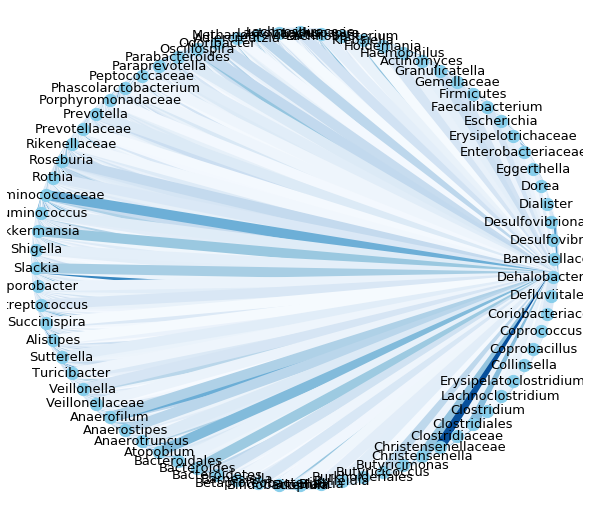

In [324]:

G1=nx.from_pandas_edgelist(link_S1, 'Var1', 'Var2', create_using=nx.Graph())
pos = nx.circular_layout(G1)
#S1_plot=hvnx.draw(G, pos, style='dashed')
plt.figure(1, figsize=(8,7))
S1_plot=nx.draw(G1,pos, with_labels=True, node_color='skyblue', node_size=150,
                edge_color=link_S1['Pearson_Coeff']*8,
                width=10.0, edge_cmap=plt.cm.Blues, font_size=13,)

plt.show()

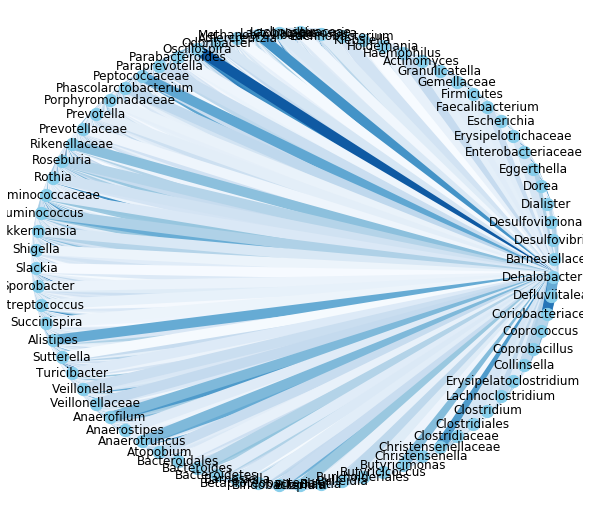

In [318]:
G2=nx.from_pandas_edgelist(link_S2, 'Var1', 'Var2', create_using=nx.Graph())
pos = nx.circular_layout(G2)
plt.figure(1, figsize=(8,7))
S2_plot=nx.draw(G2,pos, with_labels=True, node_color='skyblue', node_size=150, edge_color=link_S2['Pearson_Coeff']*8,
                width=10.0, edge_cmap=plt.cm.Blues)
plt.show()

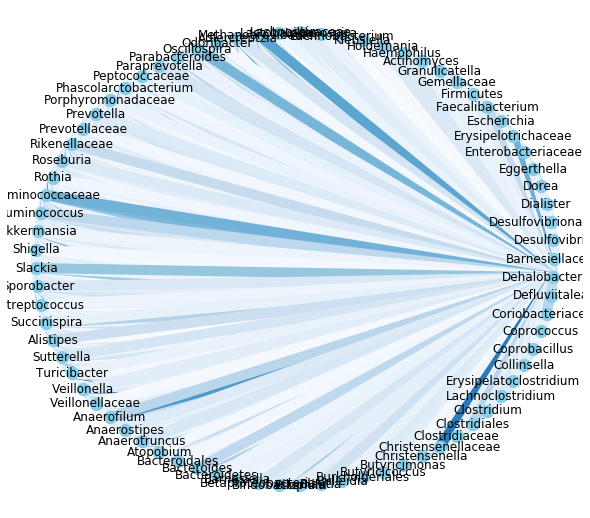

In [320]:
G3=nx.from_pandas_edgelist(link_S3, 'Var1', 'Var2', create_using=nx.Graph())
pos = nx.circular_layout(G3)
plt.figure(1, figsize=(8,7))
S2_plot=nx.draw(G3,pos, with_labels=True, node_color='skyblue', node_size=150, edge_color=link_S3['Pearson_Coeff']*2,
                width=10.0, edge_cmap=plt.cm.Blues)
plt.show()

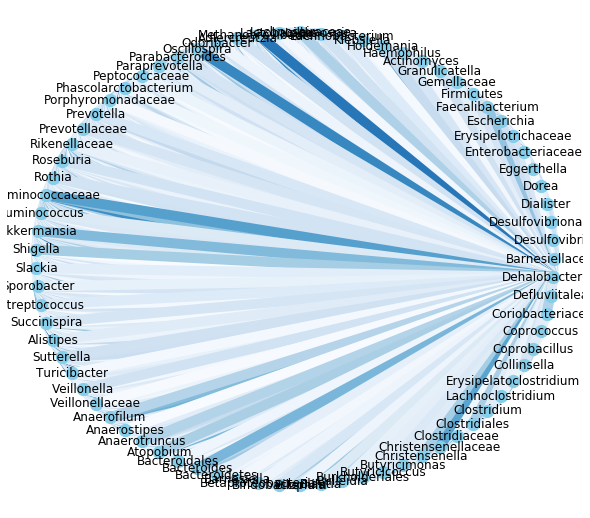

In [322]:

G4=nx.from_pandas_edgelist(link_S4, 'Var1', 'Var2', create_using=nx.Graph())
pos = nx.shell_layout(G4)
plt.figure(1, figsize=(8,7))
S4_plot=nx.draw(G4,pos, with_labels=True, node_color='skyblue', node_size=150, edge_color=link_S4['Pearson_Coeff']*8,
                width=10.0, edge_cmap=plt.cm.Blues)
plt.show()

In [328]:
mapping={}
for i,j in enumerate(all_nets.keys()):
    mapping[i]=j

print(mapping)

{0: 'S1', 1: 'S2', 2: 'S3', 3: 'S4'}


In [329]:
dist_mat=np.zeros((len(my_vals),len(my_vals))) #preparo una matrice lunga 4x4 che conterra le disteanze
print(dist_mat)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [330]:
for i in range(len(my_vals)-1):
    for j in range(i+1,len(my_vals)):
        dist_mat[i,j]=glocal(all_nets[mapping[i]],all_nets[mapping[j]])[2]
        dist_mat[j,i]=dist_mat[i,j]


In [331]:
print(dist_mat)

[[0.         0.09172278 0.14233136 0.1469396 ]
 [0.09172278 0.         0.1861974  0.19272243]
 [0.14233136 0.1861974  0.         0.05568713]
 [0.1469396  0.19272243 0.05568713 0.        ]]


In [332]:
print(my_vals)

[1 2 3 4]


In [333]:
seed = np.random.RandomState(seed=3)
mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9, random_state=seed,
                   dissimilarity="precomputed", n_jobs=1)
pos = mds.fit(dist_mat).embedding_
    

In [344]:
source = ColumnDataSource(data=dict(x=pos[:,0],
                                    y=pos[:,1],
                                    names=list(mapping.values()),
                                    colors=["green","yellow","orange","red"]))

p = figure(plot_width=800, plot_height=500)
p.circle(x='x',y='y', size=40, color='colors', alpha=0.5,source=source)
labels = LabelSet(x='x', y='y', text='names',x_offset=5, y_offset=5, source=source)
p.add_layout(labels)
show(p)